
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  

> This is a data set that contains information on movies. The information is collected from The Movie Database (TMDb) and is over 10,000 rows worth of data. The column names and their descriptions are as follows: 

id:                      unique identifier for each movie as per the database,

imdb_id :                unique identifier for each movie as per imdb,

popularity:              how well liked the movie was,

budget     :             amount spent to make the movie,

revenue :                amount made by the movie,

original_title :         name of the movie,

cast:                    main actors in the movie,

homepage :               website thae movie (or info on it) can be found on,

director :               movie director,

tagline  :               tagline used along with the title,

keywords :               keywords,

overview  :              brief description of the movie,

runtime :                length of the movie,

genres :                 movie genre,

production_companies:    companies used to produce the movie,

release_date :           date the movie was released,

vote_count :             number of votes received,

vote_average  :          total of votes received/number of votes received,

release_year :           year the movie was released,

budget_adj  :            amount spent to make the movie, adjusted to 2010,

revenue_adj  :           amount made by movie, adjusted to 2010.


### Question(s) for Analysis

>For this project, I will be analysing data associated with 'The Movie Database (TMDb)' database. I will specifically be looking at revenue and how it interacts or is affected by other variables such as budget and length, looking at if and how these variables affect the revenue of the movies in the data set. I will also be looking at the runtime of movies against budget and popularity.

>Questions for analysis:
     1. Do movies with higher budgets earn higher revenue?
     2. Do longer movies bring in more revenue?
     3. Are longer movies more popular than shorter movies?
     4. Do movies with bigger budgets have longer runtimes?


In [1]:
#Importing packages necessary for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Here, I loaded the data and inspected the data using various pandas functions. 


In [2]:
# Loading the data and printing out a out a few lines. 
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The next few cells of code are for performing operations on the data in order to inspect it

In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

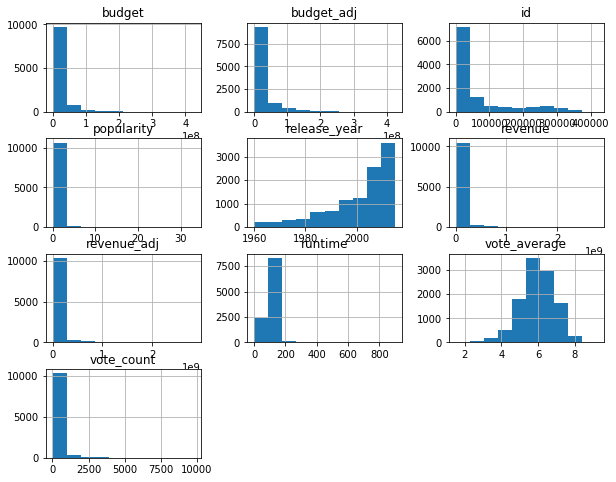

In [6]:
df.hist(figsize=(10,8));


### Data Cleaning

> These are the steps I took in order to clean the data for analysis:
>
    1.Drop columns I do not need to use in the analysis process.
    2.Filling and/or dropping null values
    3.Inspect and clean my dependent variable column
    4.Check for dulpicates and delete them

#### 1. Drop columns I do not need to use.
I droped these columns beacuse I did not feel they were necessary in my analysis

In [7]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','production_companies', 'release_date'], axis = 1, inplace=True)

I am dropping the 'adjusted' columns for both budget and revenue as I only intend to work with the initial columns for budget and revenue.

In [8]:
df.drop(['budget_adj','revenue_adj'], axis = 1, inplace=True)

Inspecting the data set once more after dropping some columns 

In [9]:
df.shape

(10866, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


####    2.Filling and/or dropping null values 

In [11]:
#checking for columns with null values
df.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

Cast, Director, Genres have some null values. I will fill them because I do not want to drop them as I may need these rows for analysis

In [12]:
#Use of the bfill method to fill null values
df.fillna(method="bfill", inplace=True)

In [13]:
#checking if null rows are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10866 non-null object
director          10866 non-null object
runtime           10866 non-null int64
genres            10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 933.9+ KB


#### 3.Inspect and clean my dependent variable column

Because revenue is important in this analysis, I will replace all 0's in this column with the mean value, rather than drop them.

In [14]:
#Define a function that can check how many rows have 0 in a particular column
def is_0(x):
    num_0 = df[(df[x]==0)].shape[0]
    print("Number of rows that have 0 for " + x + " is:", num_0 )

In [15]:
#Check how many rows have 0 for revenue
is_0("revenue")

Number of rows that have 0 for revenue is: 6016


In [16]:
Revenues = df['revenue']
Revenues.replace(to_replace = 0, value = Revenues.mean(), inplace=True)

In [17]:
#Check if revenues that are 0 have been replaced
revenue_is_0 = df[(df['revenue']==0)].shape[0]
print("Number of rows that have 0 for revenue:", revenue_is_0)

Number of rows that have 0 for revenue: 0


#### 4. Droping duplicates
Duplicates may affect analysis, it is therefore best to remove them

In [18]:
#check if there are any duplicates in the data set
df.duplicated().sum()

1

In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

>In this section, I will perform analysis to be able to adress my questions that I earlier stated and come up with visualizations for the same.


### Research Question 1 : Investigating the relationship between 'Revenue' and 'Budget'
#### Do movies with higher budgets earn higher revenue?

Replacing any 0's in the budget column for more accurate analysis

In [21]:
#Check number of rows with 0 in the budget column by calling is_0 function
is_0("budget")

Number of rows that have 0 for budget is: 5696


In [22]:
Budget = df['budget']
Budget.replace(to_replace = 0, value = Budget.mean(), inplace=True)

In [23]:
#Checking if the 0's have been replaced
budget_is_0 = df[(df['budget']==0)].shape[0]
print("Number of rows that have 0 for budget:", budget_is_0)

Number of rows that have 0 for budget: 0


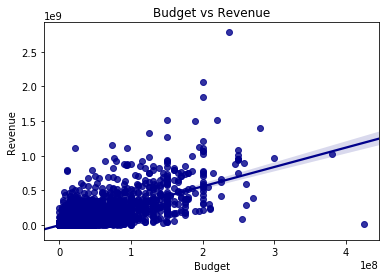

In [24]:
#Plot to show us the correlation between budget and revenue.
budget_revenue = sns.regplot(x=df['budget'], y=df['revenue'],color='DarkBlue')

budget_revenue.set_title("Budget vs Revenue",fontsize=12)
budget_revenue.set_xlabel("Budget",fontsize=10)
budget_revenue.set_ylabel("Revenue",fontsize=10)
sns.set(rc={'figure.figsize':(8,5)})


> We can see from the plot that Budget and Revenue have a positive correlation.

### Research Question 2 : Investigating the relationship between 'Revenue' and 'Runtime'
#### Do longer movies bring in more revenue?

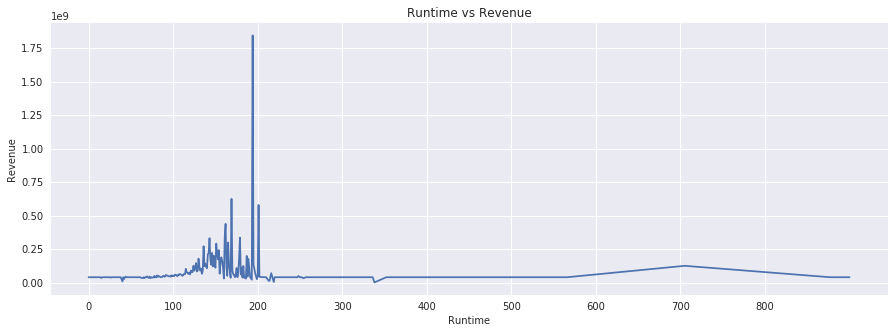

In [25]:
#Plot to show us length of movies vs revenue made by movies

runtime_revenue = df.groupby('runtime')['revenue'].mean().plot(figsize = (15,5),xticks=np.arange(0,900,100))

runtime_revenue.set_title("Runtime vs Revenue",fontsize=12)
runtime_revenue.set_xlabel("Runtime",fontsize=10)
runtime_revenue.set_ylabel("Revenue",fontsize=10)
sns.set(rc={'figure.figsize':(15,5)})



>From the above plot, we can see the that movies with an average of about 200 min are the ones that make the highest revenues. This could be due to the fact that movies of this length are more well liked. We will come up with a plot to test this.

### Research Question 3 : Investigating the relationship between 'Runtime' and 'Popularity'
#### Are longer movies more popular than shorter movies?

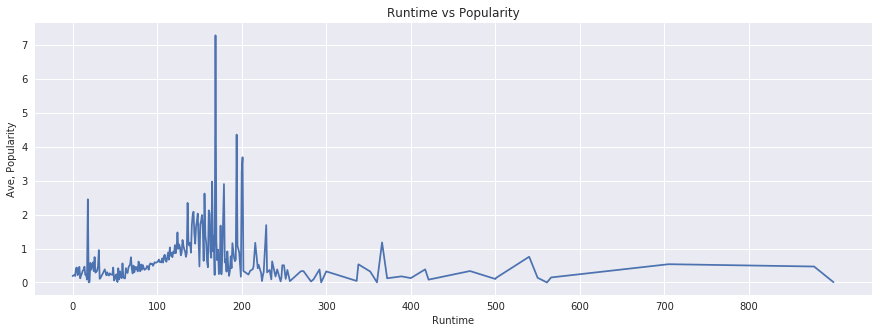

In [26]:
#Plot to show us length of movies vs revenue made by movies

runtime_popularity = df.groupby('runtime')['popularity'].mean().plot(figsize = (15,5),xticks=np.arange(0,900,100))

runtime_popularity.set_title("Runtime vs Popularity",fontsize=12)
runtime_popularity.set_xlabel("Runtime",fontsize=10)
runtime_popularity.set_ylabel("Ave, Popularity",fontsize=10)
sns.set(rc={'figure.figsize':(15,5)})

>The most popular movies range between 100 and 200 min. This therefore goes to prove our earlier hypothesis. The more popular movies make the most revenue.

### Research Question 4 : Investigating the relationship between 'Runtime' and 'Budget'
#### Do movies with bigger budgets have longer runtimes?

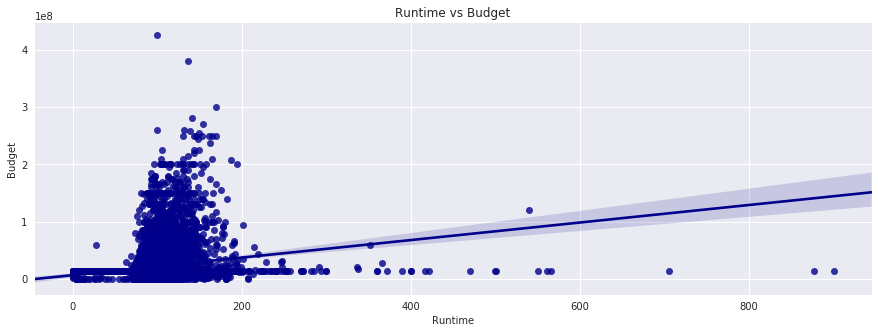

In [27]:
#Plot to show us the correlation between runtime and budget.
runtime_budget = sns.regplot(x=df['runtime'], y=df['budget'],color='DarkBlue')

runtime_budget.set_title("Runtime vs Budget",fontsize=12)
runtime_budget.set_xlabel("Runtime",fontsize=10)
runtime_budget.set_ylabel("Budget",fontsize=10)
sns.set(rc={'figure.figsize':(8,5)})

> From the above plot, we are able to see that higher budgets are actually assigned to shorter movies of about 100-200 min.

<a id='conclusions'></a>
## Conclusions

### Conclusions
>Do movies with higher budgets earn higher revenue? Because budget and revenue have a positive correlation, we can conclude that movies with higher budgets earn higher revenue.

>Do longer movies bring in more revenue? Longer movies bring in lower revenue. The highest revenue comes in from movies with a length between 100-200 min.

>Are longer movies more popular than shorter movies? Longer movies are not popular, neither are movies that are too short. The most popular movies run between 150-250 minutes.

>Do movies with bigger budgets have longer runtimes? There is a positive correlation between runtime and budget, however, movies that are less than 200 min seem to be assigned the highest budgets. Longer movies do not necessarily have higher budgets than shorter ones. 

### Limitations
> It was dificult to decide how to fill in the null values of cast, director and genre. Bfill method may not have been the most accurate method. I therefore did not use these columns. 

> There were very many 0 values in the revenue and budget columns. These could not be left this was as they would really affect the analysis. It was difficult to decide if to replace the 0 values or drop the rows. However, I think that dropping the rows would have lead me to lose a signifacant amount of data.

### References
> https://pandas.pydata.org/docs/index.html,
> https://www.w3schools.com/python/python_functions.asp,
> https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0000/modules/a8411eaf-1cfb-40f1-a8e7-9678bf06e83d/lessons/ls0526/concepts/f41d3e13-9bbc-45a7-8e7e-14f9e5ba1607
> https://www.kaggle.com/code/deepak525/investigate-tmdb-movie-dataset/notebook


In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0